In [22]:
import re
import Pandas
from collections import OrderedDict
import distance_from_lat_long
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

def split_to_time(splt):
    [hr,mn,sc] = splt.split(':')
    time = int(hr)*60**2 + int(mn)*60 + int(sc)
    return(time)
    
class Node(object):
    def __init__(self,num,prv = None, nxt = None,splt = None,pts = None):
        self.num = num
        self.time = split_to_time(splt)
        self.points = pts
        if (prv != None):
            self.prv = prv
            self.prv_edge = distance_from_lat_long.point_distance_pixel(self.num,self.prv)
        else: [self.prv,self.prv_edge] = [None,None]
            
        if (nxt != None):
            self.nxt = nxt
            self.nxt_edge = distance_from_lat_long.point_distance_pixel(self.num,self.nxt)
        else: [self.nxt,self.nxt_edge] = [None,None]
            
    def set_nxt(self,nxt):
        self.nxt = nxt
        #print self.num, self.nxt
        self.nxt_edge = distance_from_lat_long.point_distance_pixel(self.num,self.nxt)
        
def team_grapher():
    f = open('Race_data_team_splits_checkpoints.csv','r')
    lines = f.readlines()[1:]
    f.close()

    team_graph = OrderedDict()
    ST_Node = Node(num =100,splt = '0:0:0')

    for l in range(len(lines)):
        line = re.sub('\"','',lines[l])
        team = line.strip().split()[0]
        splt = line.strip().split(',')[-2]    
        point = re.sub('\)','',re.sub('\(','',line.strip().split(',')[1]))

        if '*' in splt:
            continue
        
        if point == 'F':
            point = 100
   
        elif point == 'NA':
            continue
        
        else: 
            point = int(point)
    
        pts = 10+((point-101)//10)*10
        
        if (team not in team_graph.keys()):
            team_graph[team] = []
            ST_Node.set_nxt(point)
            team_graph[team].append(deepcopy(ST_Node))
            prv_Node = ST_Node

        else:
            prv_Node = team_graph[team][-1]
            prv_Node.set_nxt(point)
    
        team_graph[team].append(Node(point, prv = prv_Node.num,splt = splt,pts = pts))
    return(team_graph)


ImportError: No module named Pandas

10.0 17.3833333333
30.0 23.2666666667
50.0 26.7833333333
10.0 32.65
40.0 16.65
30.0 24.5333333333
40.0 30.4666666667
40.0 8.33333333333
50.0 28.2666666667
40.0 18.9
50.0 27.0
40.0 18.9833333333
40.0 25.2333333333
20.0 11.6166666667
10.0 28.7833333333
10.0 4.7
20.0 3.31666666667
917.81


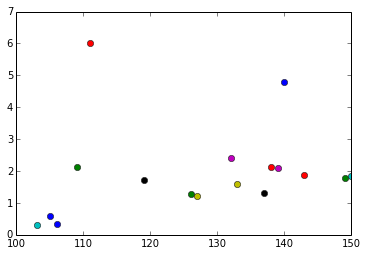

In [16]:
team_graph = team_grapher()
sec_pt = 0
for n,node in enumerate(team_graph['454']):
    #print node.num, node.prv_edge,node.nxt_edge,node.time,node.points
    if node.num != 100:
        print float(node.points),float(node.time)/60
        plt.plot(node.num,(float(node.points)/float(node.time)*60),'o')
        sec_pt += node.time/float(node.points)
print sec_pt


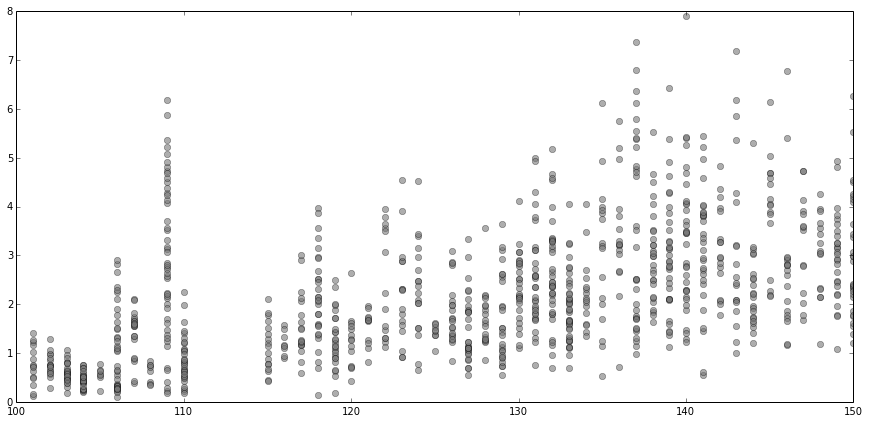

In [20]:
fig = plt.figure(figsize = (15,7))
for k in team_graph.keys():
    for n,node in enumerate(team_graph[k]):
        if node.num not in [100,111,112,113,114]:
            plt.plot(node.num,(float(node.points)/float(node.time)*60),'o', color='#777777', alpha=0.6, lw=0)

In [4]:
#print '#  ','<-time','->time','pts'
#sec_pt = 0
#for n,node in enumerate(team_graph['439']):
#    print node.num,node.prv_edge,node.nxt_edge,node.time
#    if node.num != 100:
#        plt.plot(n,node.time/float(node.points),'o')
#        plt.ylim(0,200)
#        sec_pt += node.time/float(node.points)
#print sec_pt

In [5]:
#for node in team_graph['275']:
#    print node.num,node.prv_edge,node.nxt_edge,node.time

In [6]:
#for node in team_graph['439']:
#    print node.num,node.prv_edge,node.nxt_edge,node.time

In [7]:
#for node in team_graph['409']:
#    print node.num,node.prv_edge,node.nxt_edge,node.time